In [1]:
# Importing necessary libraries
from diffusers import StableDiffusionPipeline, DDPMScheduler
from transformers import CLIPTokenizer, CLIPTextModel
from torch.utils.data import DataLoader
from PIL import Image
import torch
import pandas as pd
from datasets import Dataset
import wandb
import subprocess

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   6%|6         | 21.0M/335M [00:00<?, ?B/s]

pytorch_model.bin:   1%|          | 10.5M/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   2%|2         | 10.5M/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 10.5M/3.44G [00:00<?, ?B/s]

c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\spbsp\.cache\huggingface\hub\models--riffusion--riffusion-model-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch C:\Users\spbsp\.cache\huggingface\hub\models--riffusion--riffusion-model-v1\snapshots\8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5\vae: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\spbsp\.cache\huggingface\hub\models--riffusion--riffusion-model-v1\snapshots\8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5\vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch C:\Users\spbsp\.cache\huggingface\hub\models--riffusion--riffusion-model-v1\snapshots\8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5\unet: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\spbsp\.cache\huggingface\hub\models--riffusion--riffusion-model-v1\snapshots\8f2e752c74e8316c6eb4fdaa6598a46ce1d88af5\unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
`text_config_dict` is provided which will be used to initializ

  0%|          | 0/50 [00:00<?, ?it/s]

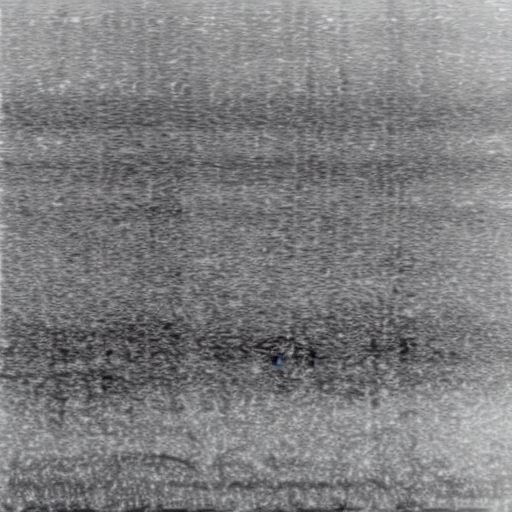

In [1]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline("").images[0]

In [ ]:
# Load the Riffusion pipeline
model_id = "riffusion/riffusion-model-v1"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.to("cuda")  # Move to GPU for faster inference

# Define the text prompt
prompt = "A calming piano melody with soft rain sounds in the background"

# Generate the spectrogram
output = pipe(prompt=prompt)

# Get the generated spectrogram as a PIL image
spectrogram_image = output.images[0]

# Save the spectrogram image
spectrogram_image.save("generated_spectrogram.png")

In [ ]:
# accelerate launch ../diffusers/examples/unconditional_image_generation/train_unconditional.py --dataset_name="../data/raw/trial" --output_dir="../results" --mixed_precision="fp16"


^C


In [ ]:
import subprocess

command = [
    "accelerate", "launch", "../diffusers/examples/unconditional_image_generation/train_unconditional.py",
    "--dataset_name=C:/Users/spbsp/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DiffAudio/data/raw/trial",
    "--output_dir=C:/Users/spbsp/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DiffAudio/results",
    "--mixed_precision=fp16"
]

#subprocess.run(command, check=True)


# Run the command and capture stdout and stderr
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Print standard output and error
print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)

STDOUT:
 
STDERR:
 2024-11-16 14:58:21.892743: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

11/16/2024 14:58:28 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16


Generating train split: 0 examples [00:00, ? examples/s]
Generating train split: 6 examples [00:00, 1201.35 examples/s]
11/16/2024 14:58:29 - INFO - __main__ - Dataset size: 6
11/16/2024 14:58:29 - INFO - __main__ - ***** Running training *****
11/16/2024 14:58:29 - INFO - __main__ -   Num examples = 6
11/16/2024 14:58:29 - INFO - __main__ -   Num Epochs = 100
11/16/2024 14:58:29 - INFO - __main__ -   Instantaneous batch size per device = 16
11/16/2024 14:58:29 - INFO - __main__ -   Total train batch size (w. par

In [ ]:
#accelerate launch train_dreambooth.py \
#    --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
#    --instance_data_dir="C:/Users\spbsp/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DiffAudio/data/raw/1000_mel" \
#    --output_dir="./spectrogram_output" \
#    --instance_prompt_file="C:/Users\spbsp/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DiffAudio/data/raw/1000dataset_prompts" \
#    --train_text_encoder \
#    --resolution=512 \
#    --train_batch_size=1 \
#    --gradient_accumulation_steps=1 \
#    --learning_rate=5e-6 \
#    --max_train_steps=1000

import subprocess

# Define the command as a list of arguments
command = [
    "accelerate", "launch", "train_dreambooth.py",
    "--pretrained_model_name_or_path=CompVis/stable-diffusion-v1-4",
    "--instance_data_dir=C:/Users/spbsp/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DiffAudio/data/raw/1000_mel",
    "--output_dir=./spectrogram_output",
    "--train_text_encoder",
    "--resolution=512",
    "--train_batch_size=1",
    "--gradient_accumulation_steps=1",
    "--learning_rate=5e-6",
    "--max_train_steps=1000"
]

# Run the command and capture stdout and stderr
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Print standard output and error
print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)

## Conditional Model - Std Finetuning

In [59]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Load CSV with image paths and prompts
data = pd.read_csv("../data/raw/finetunetrial.csv")

# Define a DatasetDict for train and validation (if you have separate sets)
dataset = DatasetDict({
    "train": Dataset.from_pandas(data),
    "validation": Dataset.from_pandas(data)  # or use a different CSV/file
})


In [60]:
from transformers import CLIPTokenizer
from PIL import Image
import torch
import numpy as np

# Initialize tokenizer for text prompts
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

def process_data(batch):
    # Load and resize image
    image = Image.open(f"../data/raw/1000_mel_spec_seg/{batch['file_name']}").convert("RGB").resize((512, 512))
    print(image)
    
    # Convert image to numpy array and then to tensor
    image_np = np.array(image)  # Convert to NumPy array
    batch["pixel_values"] = torch.tensor(image_np).permute(2, 0, 1).float() / 255.0  # Normalize to [0,1]
    
    # Tokenize the prompt
    tokenized_prompt = tokenizer(batch["additional_feature"], padding="max_length", truncation=True, max_length=77, return_tensors="pt")
    batch["input_ids"] = tokenized_prompt.input_ids[0]
    
    # Debugging: Check types
    print(f"pixel_values type: {type(batch['pixel_values'])}, input_ids type: {type(batch['input_ids'])}")

    return batch


    
# Apply the processing function to the dataset
dataset = dataset.map(process_data, batched=False)
dataset.set_format(type="torch", columns=["pixel_values", "input_ids"])



c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

<PIL.Image.Image image mode=RGB size=512x512 at 0x2E59464AE60>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BED420>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BEC5E0>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BEC760>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BED420>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3C0C880>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

<PIL.Image.Image image mode=RGB size=512x512 at 0x2E5941C1BA0>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BED360>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BEE5C0>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BEE6B0>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BED360>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>
<PIL.Image.Image image mode=RGB size=512x512 at 0x2E3A3BEF340>
pixel_values type: <class 'torch.Tensor'>, input_ids type: <class 'torch.Tensor'>


In [31]:
from diffusers import StableDiffusionPipeline

# Load the pretrained model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.to("cuda")  # Make sure you have a GPU for faster training


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:  19%|#8        | 640M/3.44G [00:00<?, ?B/s]

model.safetensors:  55%|#####5    | 273M/492M [00:00<?, ?B/s]

model.safetensors:  25%|##5       | 304M/1.22G [00:00<?, ?B/s]

c:\Users\spbsp\anaconda3\envs\ddpm\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\spbsp\.cache\huggingface\hub\models--CompVis--stable-diffusion-v1-4. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.0.dev0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [53]:
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.utils.data import DataLoader
import torch

def collate_fn(batch):
    print(f"Batch types: {[type(item['pixel_values']) for item in batch]}")  # Check types
    # Stack images and input IDs
    return {
        "pixel_values": torch.stack([item["pixel_values"] for item in batch]),
        "input_ids": torch.stack([item["input_ids"] for item in batch])
    }

# Create DataLoader with collate_fn
train_dataloader = DataLoader(dataset["train"], batch_size=1, shuffle=True, collate_fn=collate_fn)

# Optimizer
optimizer = AdamW(pipe.unet.parameters(), lr=5e-6)

num_train_timesteps = 1000

# Training loop
for epoch in range(5):  # Adjust based on your requirements
    for batch in train_dataloader:
        # Move images and tokens to the device
        images = batch["pixel_values"].to("cuda")
        input_ids = batch["input_ids"].to("cuda")

        # Get text embeddings
        text_embeddings = pipe.text_encoder(input_ids)[0]

        # Generate 1-channel noise and sample a random timestep
         # Scale noise based on timestep
        noise_scale = torch.sqrt(torch.tensor(timestep / num_train_timesteps, device="cuda"))
        noise = torch.randn((images.shape[0], 1, images.shape[2], images.shape[3]), device="cuda") * noise_scale  # Shape: (batch_size, 1, 512, 512)
        timestep = torch.randint(0, num_train_timesteps, (1,), device="cuda").long()  # Random timestep

        # Apply noise to images (simulating a diffusion step)
        noisy_images = torch.cat([images, noise], dim=1)
        loss = pipe.unet(noisy_images, timestep=timestep, encoder_hidden_states=text_embeddings).loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1} completed with loss {loss.item()}")
    
# Save model
pipe.save_pretrained("fine_tuned_model")


Batch types: [<class 'torch.Tensor'>]


C:\Users\spbsp\AppData\Local\Temp\ipykernel_51068\209457800.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noise_scale = torch.sqrt(torch.tensor(timestep / num_train_timesteps, device="cuda"))


OutOfMemoryError: CUDA out of memory. Tried to allocate 2048.00 GiB (GPU 0; 6.00 GiB total capacity; 17.56 GiB already allocated; 0 bytes free; 17.76 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# Inference Code

# Generate images using the fine-tuned model
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# Load the image-to-image pipeline and apply LoRA weights
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id)
pipe.to("cuda")
pipe.unet.from_pretrained("lora_fine_tuned_model")

# Load the initial image
initial_image = Image.open("path/to/your/initial_image.jpg").convert("RGB")
initial_image = initial_image.resize((512, 512))  # Resize to model's expected input size

# Define the text prompt
prompt = "A calm melody with soft piano notes in a beautiful spectrogram style"

# Run the image-to-image generation with the prompt and initial image
output = pipe(prompt=prompt, init_image=initial_image, strength=0.75, guidance_scale=7.5)

# Save the generated image
generated_image = output.images[0]
generated_image.save("generated_spectrogram.png")



## Conditional Model - Finetuning Using LoRa

In [ ]:
!pip install diffusers transformers accelerate peft pillow


In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import CLIPTokenizer
from PIL import Image
import torch

In [63]:
# Set Up the LoRA Fine-Tuning Model

from diffusers import StableDiffusionPipeline
from peft import LoraConfig, get_peft_model

# Load the base model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.to("cuda")

for name, module in pipe.unet.named_modules():
    print(name)

# Set up LoRA configuration
lora_config = LoraConfig(
    r=4,                    # Low-rank parameter
    lora_alpha=16,          # LoRA scaling factor
    target_modules=["cross_attention"],  # Modules to apply LoRA on
    lora_dropout=0.1        # Dropout for regularization
)

# Apply LoRA to the pipeline
pipe.unet = get_peft_model(pipe.unet, lora_config)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.



conv_in
time_proj
time_embedding
time_embedding.linear_1
time_embedding.act
time_embedding.linear_2
down_blocks
down_blocks.0
down_blocks.0.attentions
down_blocks.0.attentions.0
down_blocks.0.attentions.0.norm
down_blocks.0.attentions.0.proj_in
down_blocks.0.attentions.0.transformer_blocks
down_blocks.0.attentions.0.transformer_blocks.0
down_blocks.0.attentions.0.transformer_blocks.0.norm1
down_blocks.0.attentions.0.transformer_blocks.0.attn1
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0
down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.1
down_blocks.0.attentions.0.transformer_blocks.0.norm2
down_blocks.0.attentions.0.transformer_blocks.0.attn2
down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q
down_blocks.0.attenti

ValueError: Target modules {'cross_attention'} not found in the base model. Please check the target modules and try again.

In [ ]:
# Fine-Tuning Loop with LoRA
from torch.utils.data import DataLoader
from torch.optim import AdamW

# Create DataLoader
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Optimizer (only update LoRA parameters)
optimizer = AdamW(filter(lambda p: p.requires_grad, pipe.unet.parameters()), lr=1e-4)

# Training loop
for epoch in range(3):  # Adjust the number of epochs as needed
    for batch in train_dataloader:
        images = batch["pixel_values"].to("cuda")  # Move images to GPU
        input_ids = batch["input_ids"].to("cuda")  # Move input IDs to GPU

        # Generate text embeddings
        text_embeddings = pipe.text_encoder(input_ids)[0]

        # Generate noise and apply it to images
        noise = torch.randn(images.shape).to("cuda")
        noisy_images = images + noise
        loss = pipe.unet(noisy_images, text_embeddings).loss  # Calculate loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1} completed with loss {loss.item()}")


In [ ]:
pipe.unet.save_pretrained("lora_fine_tuned_model")

In [ ]:
# Inference Code

# Generate images using the fine-tuned model
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# Load the image-to-image pipeline and apply LoRA weights
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id)
pipe.to("cuda")
pipe.unet.from_pretrained("lora_fine_tuned_model")

# Load the initial image
initial_image = Image.open("path/to/your/initial_image.jpg").convert("RGB")
initial_image = initial_image.resize((512, 512))  # Resize to model's expected input size

# Define the text prompt
prompt = "A calm melody with soft piano notes in a beautiful spectrogram style"

# Run the image-to-image generation with the prompt and initial image
output = pipe(prompt=prompt, init_image=initial_image, strength=0.75, guidance_scale=7.5)

# Save the generated image
generated_image = output.images[0]
generated_image.save("generated_spectrogram.png")